In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
import pickle
import os

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
cols = [ 'expiration_id', 'protocol', 'src_port', 'dst_port',
       'ip_version',   'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps',
       'src2dst_min_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps',
       'src2dst_max_ps', 'dst2src_min_ps', 'dst2src_mean_ps',
       'dst2src_stddev_ps', 'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'src2dst_max_piat_ms', 'dst2src_min_piat_ms',
       'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets', 'bidirectional_ack_packets',
       'bidirectional_psh_packets', 'bidirectional_rst_packets',
       'bidirectional_fin_packets', 'src2dst_syn_packets', 'src2dst_ack_packets',
       'src2dst_psh_packets', 'src2dst_rst_packets',
       'src2dst_fin_packets', 'dst2src_syn_packets', 'dst2src_ack_packets',
       'dst2src_psh_packets', 'dst2src_rst_packets',
       'dst2src_fin_packets','application_name',
       'application_category_name', 'application_is_guessed',
       'application_confidence', 'content_type', 'udps.num_pkts_up_to_128_bytes',
       'udps.num_pkts_128_to_256_bytes', 'udps.num_pkts_256_to_512_bytes',
       'udps.num_pkts_512_to_1024_bytes',
       'udps.num_pkts_1024_to_1514_bytes', 'udps.min_ttl', 'udps.max_ttl',
       'udps.min_ip_pkt_len', 'udps.max_ip_pkt_len', 'udps.src2dst_flags',
       'udps.dst2src_flags', 'udps.tcp_flags', 'udps.tcp_win_max_in',
       'udps.tcp_win_max_out', 'udps.icmp_type', 'udps.icmp_v4_type',
       'udps.dns_query_id', 'udps.dns_query_type', 'udps.dns_ttl_answer',
       'udps.ftp_command_ret_code', 'udps.retransmitted_in_packets',
       'udps.retransmitted_out_packets', 'udps.retransmitted_in_bytes',
       'udps.retransmitted_out_bytes', 'udps.src_to_dst_second_bytes',
       'udps.dst_to_src_second_bytes', 'udps.src_to_dst_avg_throughput',
       'udps.dst_to_src_avg_throughput', 'udps.src_to_dst_second_bytes2',
       'udps.dst_to_src_second_bytes2', 'udps.src_to_dst_avg_throughput2',
       'udps.dst_to_src_avg_throughput2', 'udps.tcp_init_ms',
       'udps.tcp_synack_ack_ms', 'udps.tcp_half_closed_time_ms',
       'udps.num_pkts_after_termination',
       'udps.src2dst_first_packet_payload_len',
       'udps.dst2src_first_packet_payload_len',
       'udps.bidirectional_transport_bytes',
       'udps.bidirectional_payload_bytes', 'udps.src2dst_transport_bytes',
       'udps.src2dst_payload_bytes', 'udps.dst2src_transport_bytes',
       'udps.dst2src_payload_bytes',
       'udps.src2dst_most_freq_payload_ratio',
       'udps.src2dst_most_freq_payload_len',
       'udps.dst2src_most_freq_payload_ratio',
       'udps.dst2src_most_freq_payload_len',
       'udps.bidirectional_mean_packet_relative_times',
       'udps.bidirectional_stddev_packet_relative_times',
       'udps.bidirectional_variance_packet_relative_times',
       'udps.bidirectional_coeff_of_var_packet_relative_times',
       'udps.bidirectional_skew_from_median_packet_relative_times',
       'udps.src2dst_mean_packet_relative_times',
       'udps.src2dst_stddev_packet_relative_times',
       'udps.src2dst_variance_packet_relative_times',
       'udps.src2dst_coeff_of_var_packet_relative_times',
       'udps.src2dst_skew_from_median_packet_relative_times',
       'udps.dst2src_mean_packet_relative_times',
       'udps.dst2src_stddev_packet_relative_times',
       'udps.dst2src_variance_packet_relative_times',
       'udps.dst2src_coeff_of_var_packet_relative_times',
       'udps.dst2src_skew_from_median_packet_relative_times',
       'udps.min_req_res_time_diff', 'udps.max_req_res_time_diff',
       'udps.mean_req_res_time_diff', 'udps.stddev_req_res_time_diff',
       'udps.variance_req_res_time_diff',
       'udps.coeff_of_var_req_res_time_diff',
       'udps.skew_from_median_req_res_time_diff',
       'udps.src2dst_small_packet_payload_packets',
       'udps.src2dst_small_packet_payload_ratio',
       'udps.dst2src_small_packet_payload_packets',
       'udps.dst2src_small_packet_payload_ratio',
       'udps.sent_recv_packet_ratio',
       'udps.bidirectional_ps_first_quartile',
       'udps.bidirectional_ps_second_quartile',
       'udps.bidirectional_ps_third_quartile',
       'udps.bidirectional_ps_median_absoulte_deviation',
       'udps.bidirectional_ps_skewness', 'udps.bidirectional_ps_kurtosis',
       'udps.bidirectional_piat_first_quartile',
       'udps.bidirectional_piat_second_quartile',
       'udps.bidirectional_piat_third_quartile',
       'udps.bidirectional_piat_median_absoulte_deviation',
       'udps.bidirectional_piat_skewness',
       'udps.bidirectional_piat_kurtosis',
       'udps.median_req_res_time_diff', 'Attack']

In [3]:
def port_feature(port):
    if port < 1024:
        return 1
    elif port < 49152 and port >= 1024:
        return 2
    else:
        return 3        

In [4]:
def encode(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    les = {}
    for each in cols:
        le_col = LabelEncoder()
        df[each] = le_col.fit_transform(df[each])
        les[each] = le_col
       
    return df, les


In [5]:
def save_predictions(predictions, targets, timeout, save_path= "results/ET"):
    name_file_pred = 'predictions_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    name_file_y = 'targets_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"

    pickle.dump(predictions, open(os.path.join(save_path, name_file_pred), 'wb') )
    pickle.dump(targets, open(os.path.join(save_path, name_file_y), 'wb') )
    
def load_predictions(timeout, save_path= "results/ET"):
    name_file_pred = 'predictions_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    name_file_y = 'targets_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    
    predictions =  pickle.load(open(os.path.join(save_path, name_file_pred), 'rb') )
    targets =  pickle.load(open(os.path.join(save_path, name_file_y), 'rb') )
    return predictions, targets

In [6]:
timeouts = [(0.5,2), (1, 2), (2,2), (0.5,3), (1,3), (2, 3), (3,3), (0.5,4), (1, 4), (2,4), (3,4), (4,4), (0.5,5), (1,5), (2,5), (3,5), (4,5), (5,5), (0.5, 30), (1, 30), (2,30), (3,30), (4,30), (5,30), (10, 30), (0.5, 60), (1, 60), (2,60), (3,60), (4,60), (5,60), (10, 60)]

In [7]:
def split_data(data):
    train_idx, test_idx = next(StratifiedKFold(n_splits=3).split(data, data['Attack']))
    train, test = data.iloc[train_idx].reset_index(drop=True), data.iloc[test_idx].reset_index(drop=True)
    return train, test

# Training

In [8]:
timeout = (4, 5) # the best timeout for this model and this dataset

idle, active = timeout
print("Processing timeout : ", timeout)
idle, active = timeout
out_dir = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/timeouts-IDS/NFStream/extractions/new_idle_{idle}min_active_{active}min/UNSW-NB15'
df = pd.read_csv(out_dir+"/UNSW-NB15.csv")

df = df[~df.Attack.str.contains('direction_flip')]
df = df.sort_values(by=['bidirectional_last_seen_ms']).reset_index(drop=True)
df_new = df[cols]
df_new['application_name'] = df_new['application_name'].apply(lambda x: x.split(".")[0])
df_new['content_type'] = df_new['content_type'].fillna("unkown/unkown")
df_new['content_sub_type'] = df_new['content_type'].apply(lambda x: x.split("/")[1])
df_new['content_type'] = df_new['content_type'].apply(lambda x: x.split("/")[0])
#df_new['src_port'] = df_new['src_port'].apply(lambda x: port_feature(x))
#df_new['dst_port'] = df_new['dst_port'].apply(lambda x: port_feature(x))
df_new = df_new.fillna(0)
# Encoding categorical variables
categ_cols = ["application_name", "application_category_name", "content_sub_type", "content_type"]
df_new, lbl_encoders = encode(df_new, categ_cols)

# Split data into train and test sets
train, test = split_data(df_new)
y_train = train['Attack']
X_train = train.drop('Attack', axis=1)
y_test = test['Attack']
X_test = test.drop('Attack', axis=1)

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)



# Cumulative Learning Curve Setup
subset_percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.98, 1.0]  # 20%, 40%, 60%, 80%, and 100% of the training data
#subset_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
cumulative_f1_scores, cumulative_accuracy_scores = [], []  # Store F1 scores for plotting

for subset in subset_percentages:
    # Subset training data by selecting a percentage of it
    subset_size = int(len(X_train) * subset)
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # Train the model on the subset
    clf.fit(X_train_subset, y_train_subset)

    # Make predictions on the test set
    pred = clf.predict(X_test)

    # Evaluate the performance (classification report and F1 score)
    report = classification_report(y_test, pred, target_names=le.classes_, digits=4)
    f1 = f1_score(y_true=y_test, y_pred=pred, average='macro')
    accuracy = accuracy_score(y_true=y_test, y_pred=pred)

    cumulative_f1_scores.append(f1)
    cumulative_accuracy_scores.append(accuracy)

    # Logging
    print(f"Subset size: {subset_size} ({int(subset * 100)}%), F1 Score: {f1:.4f}")
    print(f"Subset size: {subset_size} ({int(subset * 100)}%), Accuracy: {accuracy:.4f}")

plt.figure(figsize=(9, 5))
plt.plot([int(subset * 100) for subset in subset_percentages], cumulative_f1_scores, marker='.')
plt.xlabel('Training Set Size (%)', fontsize=16)
plt.ylabel('F1 Score (Macro)', fontsize=16)
plt.grid(True)
plt.savefig("plots/cumf1_unsw.pdf", format="pdf")
plt.close()  # Close the plot after saving

# Accuracy curve (Separate Plot and Save)
plt.figure(figsize=(9, 5))
plt.plot([int(subset * 100) for subset in subset_percentages], cumulative_accuracy_scores, marker='.')
plt.xlabel('Training Set Size (%)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True)
plt.savefig("plots/cumAcc_unsw.pdf", format="pdf")
plt.close()  # Close the plot after saving

Processing timeout :  (4, 5)
Subset size: 136532 (10%), F1 Score: 0.0985
Subset size: 136532 (10%), Accuracy: 0.9698
Subset size: 273064 (20%), F1 Score: 0.0985
Subset size: 273064 (20%), Accuracy: 0.9698
Subset size: 409596 (30%), F1 Score: 0.0985
Subset size: 409596 (30%), Accuracy: 0.9698
Subset size: 546129 (40%), F1 Score: 0.0995
Subset size: 546129 (40%), Accuracy: 0.9698
Subset size: 682661 (50%), F1 Score: 0.5870
Subset size: 682661 (50%), Accuracy: 0.9858
Subset size: 819193 (60%), F1 Score: 0.6853
Subset size: 819193 (60%), Accuracy: 0.9891
Subset size: 955726 (70%), F1 Score: 0.7213
Subset size: 955726 (70%), Accuracy: 0.9901
Subset size: 1092258 (80%), F1 Score: 0.7359
Subset size: 1092258 (80%), Accuracy: 0.9906
Subset size: 1160524 (85%), F1 Score: 0.7420
Subset size: 1160524 (85%), Accuracy: 0.9907
Subset size: 1228790 (90%), F1 Score: 0.7427
Subset size: 1228790 (90%), Accuracy: 0.9908
Subset size: 1297056 (95%), F1 Score: 0.7493
Subset size: 1297056 (95%), Accuracy: 0.

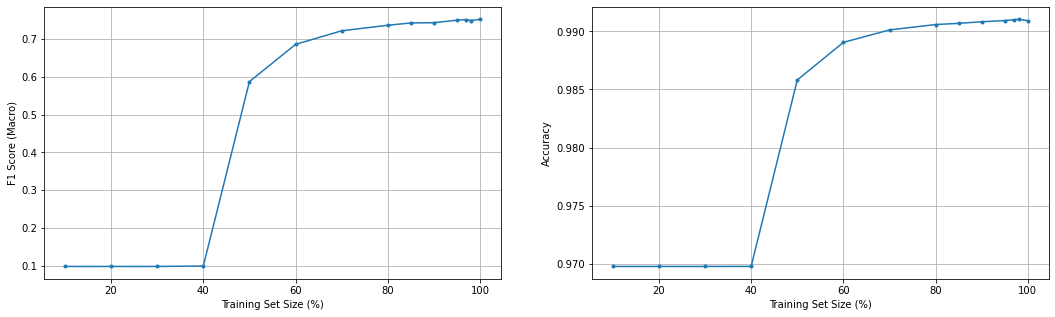

In [17]:
# Plot the cumulative learning curves for both F1 score and accuracy
plt.figure(figsize=(18, 5))

# F1 Score curve
plt.subplot(1, 2, 1)
plt.plot([int(subset * 100) for subset in subset_percentages], cumulative_f1_scores, marker='.')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1 Score (Macro)')
#plt.title('F1 Score vs Training Set Size')
plt.grid(True)
plt.savefig("plots/cumf1_unsw.pdf", format="pdf")

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot([int(subset * 100) for subset in subset_percentages], cumulative_accuracy_scores, marker='.')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
#plt.title('Accuracy vs Training Set Size')
plt.grid(True)
plt.savefig("plots/cumAcc_unsw.pdf", format="pdf")